<a href="https://colab.research.google.com/github/travislatchman/Autoencoders-Image-Reconstruction-and-Denoising/blob/main/PCA_based_Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA-based Face Recognition

Import package here

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib as matlib
from scipy import linalg
import os

Run to mount your google drives:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# example goes like:
DataPath  = '/content/drive/MyDrive/Colab Notebooks/MLSP/orl_faces'
ResultPath = '/content/drive/MyDrive/Colab Notebooks/MLSP/Lab_3/results'

**Step 1: Load the training data**

Read all the training images, reshape them into a vector and store them into the columns of a 10304x360 matrix where 360 is the total number of images and 10304 (=112*92) is the dimension of the vectors.

You can read images with-


> plt.imread(filename)



In [4]:
# Initialize a matrix to store all the training images as column vectors
training_data = np.zeros((112*92, 360))

# Counter for the current column in the matrix
column = 0

# Iterate through each folder (s1, s2, ..., s40) inside the 'Train' directory
for folder in sorted(os.listdir(os.path.join(DataPath, 'Train'))):
    folder_path = os.path.join(DataPath, 'Train', folder)

    # Iterate through each image file (1.pgm, 2.pgm, ..., 9.pgm) inside the folder
    for file_name in sorted(os.listdir(folder_path)):
        file_path = os.path.join(folder_path, file_name)

        # Read the image and convert it to grayscale
        image = plt.imread(file_path)

        # Reshape the image into a column vector
        image_vector = image.reshape(-1, 1)

        # Store the image vector in the corresponding column of the training_data matrix
        training_data[:, column] = image_vector[:, 0]

        # Increment the column counter
        column += 1


**Step 2: Perform PCA to extract the eigen-faces**

1. Center the data
2. Compute the correlation matrix if necessary
3. Use either the SVD or eig function from scipy.linalg to perform SVD/eigen-decomposition and get the eigenvectors and eigenvalues. Take the real part of the eigenvectors if they are complex. Please refer to your class lecture on PCM to figure out the following things-
	- SVD/eigendecompositon of what?
	- How to get the eigenfaces and the corresponding eigenvalues from SVD/eig.
4. Normalize the eigenvectors by their L2 norm if necessary.



***2.1 Center the Data***
Subtract the mean from each dimension to center the data.

In [5]:
mean_face = np.mean(training_data, axis=1)
centered_data = training_data - matlib.repmat(mean_face, training_data.shape[1], 1).T


***2.2 Perform SVD (no need for L2 normalization)***


In [6]:
U, S, Vt = linalg.svd(centered_data, full_matrices=False)
eigenfaces = U

***2.2 Perform Eigendecomposition***

In [6]:
# cov_matrix = np.cov(centered_data, rowvar=True)

In [ ]:
# eigenvalues, eigenvectors = linalg.eig(cov_matrix)
# # Sort by eigenvalue in descending order
# idx = eigenvalues.argsort()[::-1]
# eigenvalues = eigenvalues[idx]
# eigenvectors = eigenvectors[:, idx]
# eigenfaces = np.real(eigenvectors)


In [ ]:
# eigenfaces = eigenfaces / np.linalg.norm(eigenfaces, axis=0)


**Step 3: Plot the eigenvalues**

Sort the eigenvectors and eigenvalues in descending order (if they are not sorted). Then plot the eigenvalues.



### SVD

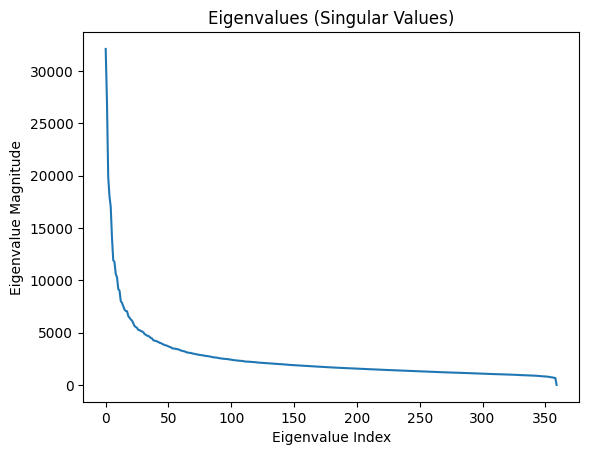

In [7]:
plt.plot(S)
plt.title('Eigenvalues (Singular Values)')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue Magnitude')
plt.show()


### Eigendecomposition

In [ ]:
# plt.plot(eigenvalues)
# plt.title('Eigenvalues')
# plt.xlabel('Eigenvalue Index')
# plt.ylabel('Eigenvalue Magnitude')
# plt.show()


**Step 4: Plot the first 3 eigenfaces and the last eigenface**

Make sure that the eigenfaces are sorted in descending order of their eigenvalues. Remember that the images were mean-normalized and reshaped into vectors. So to plot the eigenfaces, you have to undo these steps.

You can plot the images with-

> plt.imshow(image, cmap='binary_r')

> plt.show()


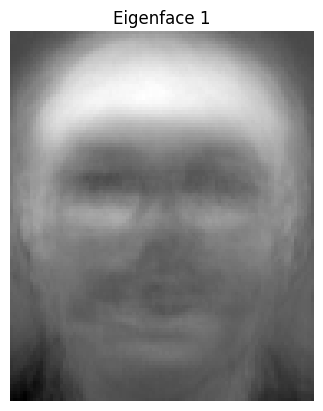

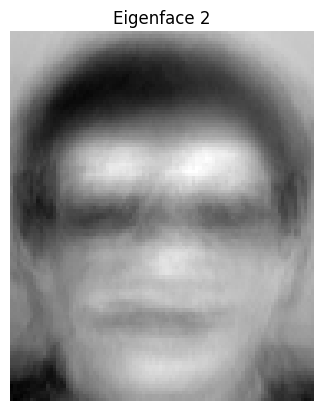

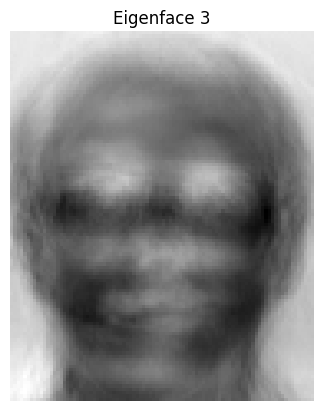

In [8]:
# Reshape the eigenfaces back to 2D images
image_shape = (112, 92)  # Shape of original images

# First 3 eigenfaces
for i in range(3):
    eigenface_image = eigenfaces[:, i].reshape(image_shape)
    plt.imshow(eigenface_image, cmap='gray')
    plt.title(f'Eigenface {i+1}')
    plt.axis('off') # To remove axes
    plt.show()

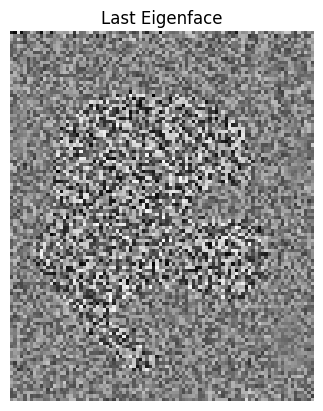

In [9]:
# Last eigenface
last_eigenface_image = eigenfaces[:, -1].reshape(image_shape)
plt.imshow(last_eigenface_image, cmap='gray')
plt.title('Last Eigenface')
plt.axis('off') # To remove axes
plt.show()

**Step 5: Pick a face and reconstruct it using $k = {10, 20, 30, 40}$ eigenvectors.**

Plot all of these reconstructions and compare them. For each value of $k$, plot the original image, reconstructed image, and the difference between the original image and reconstruction in each case. Write your observations in comments.







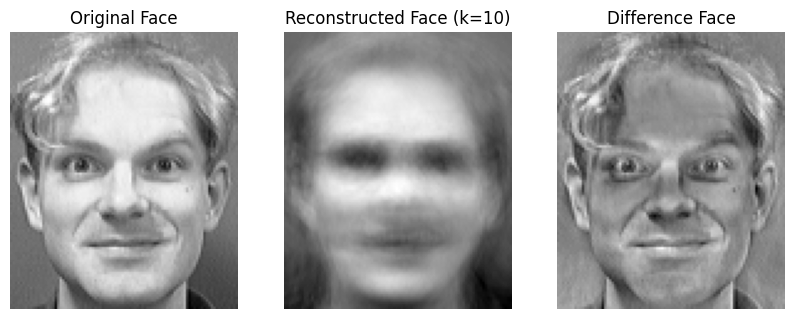

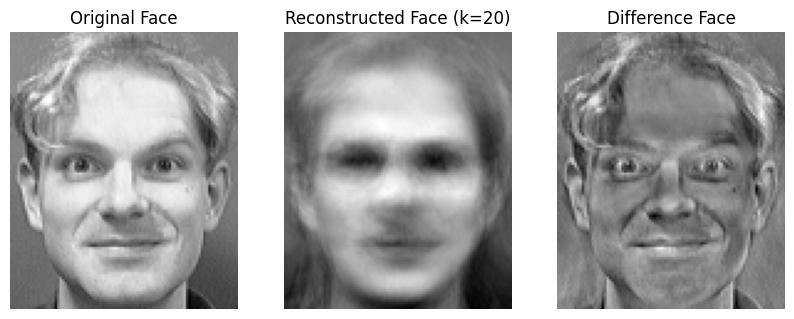

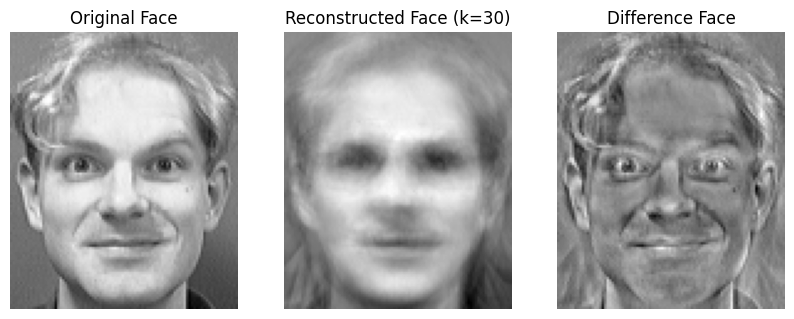

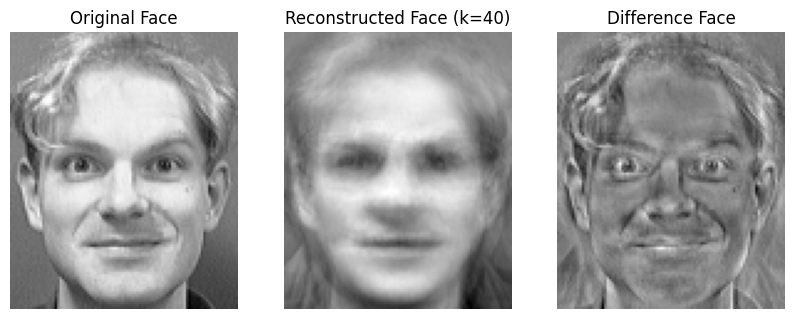

In [45]:
# Choose a random face from the dataset
rand_idx = np.random.randint(training_data.shape[1])
original_face = training_data[:, rand_idx]

# Compute the mean face
mean_face = np.mean(training_data, axis=1)

# Center the chosen face
centered_face = original_face - mean_face

# List of k values
k_values = [10, 20, 30, 40]

for k in k_values:
    # Project the centered face onto the first k eigenfaces
    projection = np.dot(eigenfaces[:, :k].T, centered_face)

    # Reconstruct the face from the projection
    reconstructed_face = np.dot(eigenfaces[:, :k], projection) + mean_face

    # Compute the difference between the original and reconstructed faces
    diff_face = original_face - reconstructed_face

    # Plot original face, reconstructed face, and the difference
    fig, axs = plt.subplots(1, 3, figsize=(10, 5))

    axs[0].imshow(original_face.reshape(image_shape), cmap='gray')
    axs[0].set_title('Original Face')
    axs[0].axis('off')

    axs[1].imshow(reconstructed_face.reshape(image_shape), cmap='gray')
    axs[1].set_title(f'Reconstructed Face (k={k})')
    axs[1].axis('off')

    axs[2].imshow(diff_face.reshape(image_shape), cmap='gray')
    axs[2].set_title('Difference Face')
    axs[2].axis('off')

    plt.show()


### Eigendecom

**Step 6: Load the testing data, and reshape it similar to the training data.**

Subtract the training mean from the test images.

In [12]:
# Initialize the matrix for testing data
testing_data = np.empty((112 * 92, 40))  # 40 is the number of test images

# Load the testing images
for person in range(1, 41):
    # Path to the folder containing the test image for this person
    folder_path = os.path.join(DataPath, 'Test', f's{person}')

    # Read the test image
    image_path = os.path.join(folder_path, '10.pgm')
    image = plt.imread(image_path)

    # Reshape the image into a vector and store in the testing_data matrix
    testing_data[:, person - 1] = image.flatten()

# Subtract the training mean from the test images
testing_data_centered = testing_data - matlib.repmat(mean_face, 40, 1).T


**Step 7: For each photograph in the testing dataset, predict the identity of the person.**

Implement a classifier to do the following steps -

1. Determine the projection of each test image onto $k$ number of eigenfaces.
2. Compare the distance of each test image's projection to the projections of all images in the training data.
3. Find the closest training image for each test image by finding the training projection with minimum distance to the test projection.
4. Predict the identity of each test image by assigning it the identity of the closest training image. Calculate and print the accuracy.

Do the steps for each $k = {10, 20, 30, 40}$. Write the accuracies of all $k$s at the end in comments.

In [17]:
# Function to predict the identity of a test image
def predict_identity(test_image, training_projections, k):
    """Predicts the identity of a given test image using its projection onto the eigenfaces.

    Args:
        test_image (numpy.ndarray): The test image represented as a vector, to be predicted.
        training_projections (numpy.ndarray): The projections of all training images onto the eigenfaces.
        k (int): The number of top eigenfaces to consider for the projection.

    Returns:
        int: The predicted identity (index) of the test image, with 9 images per person in the training set.

    Example:
        >>> test_image = np.array([...])
        >>> training_projections = np.array([...])
        >>> k = 10
        >>> predict_identity(test_image, training_projections, k)
        4  # The predicted identity
    """
    # Project the test image onto the first k eigenfaces
    test_projection = np.dot(eigenfaces[:, :k].T, test_image)

    # Compute the Euclidean distance between the test projection and all training projections
    distances = np.linalg.norm((training_projections[:, :k] - test_projection).T, axis=1)


    # Find the index of the closest training projection
    closest_idx = np.argmin(distances)

    # Return the identity (index) of the closest training image
    return closest_idx // 9  # 9 images per person in training


In [18]:
# Determine the projections of all training images for each k
training_projections = np.dot(eigenfaces.T, training_data)

# List of k values
k_values = [10, 20, 30, 40]

# Iterate over k values and predict the identities
for k in k_values:
    correct_predictions = 0
    for i, test_image in enumerate(testing_data_centered.T):
        # Predict the identity of the test image
        predicted_identity = predict_identity(test_image, training_projections, k)

        # Check if the prediction is correct (test images are in the same order as training images)
        if predicted_identity == i :  # 1 images per person in testing
            correct_predictions += 1

    # Calculate and print the accuracy
    accuracy = correct_predictions / 40 * 100  # 40 test images
    print(f"Accuracy for k={k}: {accuracy}%")


# Write the accuracies in comments
# Accuracies for different k values may vary depending on the dataset and preprocessing


Accuracy for k=10: 5.0%
Accuracy for k=20: 2.5%
Accuracy for k=30: 2.5%
Accuracy for k=40: 2.5%


In [24]:
# Eigenvectors and Eigenfaces
eigfaces = eigenfaces

# Initialize accuracies and guesses arrays for storing results
accuracies = np.zeros((40,4))
guesses = np.zeros((40,4))
k_values = [10, 20, 30, 40]

for kcount, k in enumerate(k_values):
  # Project all eigenfaces to all train images using first k weights and vectors
  train_proj = np.dot(np.dot(eigfaces[:,:k], eigfaces[:,:k].T), training_data)

  # Project all eigenfaces to all test images using first k weights and vectors
  test_proj = np.dot(np.dot(eigfaces[:,:k], eigfaces[:,:k].T), testing_data_centered)

  for test_idx, test_img in enumerate(test_proj.T):
    error = np.inf

    for idx, train_proj_img in enumerate(train_proj.T):
      test_error = np.linalg.norm(test_img - train_proj_img)

      if test_error < error:
        error = test_error
        best_idx = idx

    accuracies[test_idx, kcount] = int(test_idx) == int(best_idx // 9) # this should match test_idx for accurate classification
    guesses[test_idx,kcount] = best_idx # used for step 8

accuracy_overall = sum(accuracies) / 40 *100
print(accuracy_overall) # print accuracies for respective k


[2.5 2.5 2.5 2.5]


**Step 8: Show the closest image in the training dataset for the $s_1$ test example.**

Plot the test image and the closest training images found using $k = {10, 20, 30, 40}$.

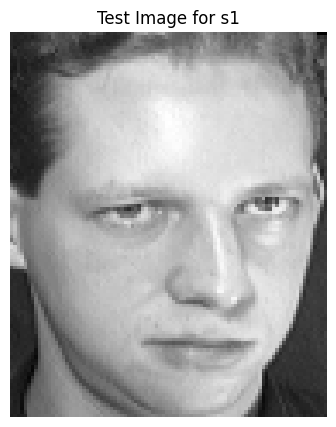

In [20]:
# Path to the folder containing the test image for person s1
folder_path_s1 = os.path.join(DataPath, 'Test', 's1')

# Read the test image
image_path_s1 = os.path.join(folder_path_s1, '10.pgm')
test_image_s1 = plt.imread(image_path_s1)

# Reshape the test image into a vector
test_image_vector_s1 = test_image_s1.flatten()

# Center the test image
test_image_centered_s1 = test_image_vector_s1 - mean_face

# Plot the original test image
plt.figure(figsize=(5, 5))
plt.imshow(test_image_s1, cmap='gray')
plt.title('Test Image for s1')
plt.axis('off')
plt.show()




In [21]:
# Function to find the closest training image
def closest_training_image(test_image, training_projections, k):
    # Project the test image onto the first k eigenfaces
    test_projection = np.dot(eigenfaces[:, :k].T, test_image)

    # Compute the Euclidean distance between the test projection and all training projections
    distances = np.linalg.norm((training_projections[:, :k] - test_projection).T, axis=1)

    # Find the index of the closest training projection
    closest_idx = np.argmin(distances)

    # Return the closest training image
    return training_data[:, closest_idx]



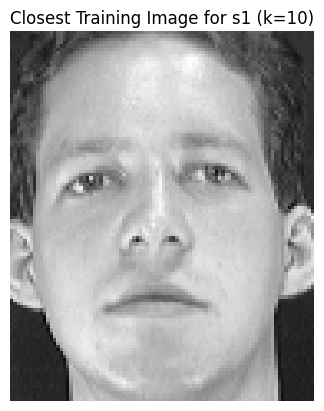

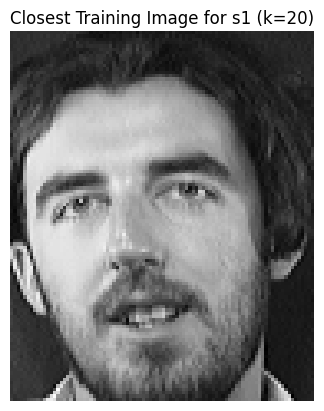

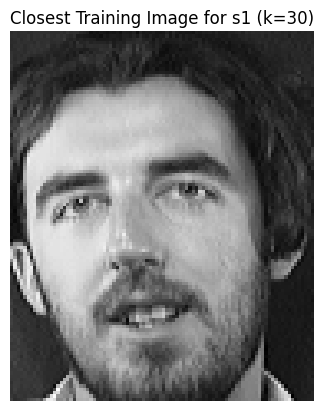

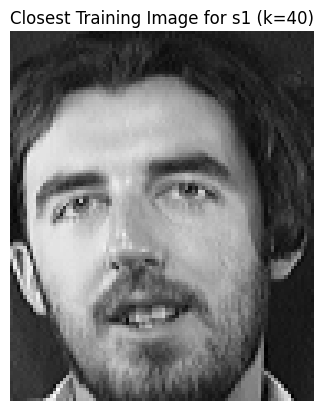

In [22]:
# Iterate over different k values
for k in k_values:
    closest_image = closest_training_image(test_image_centered_s1, training_projections, k)

    # Plot the closest training image
    plt.imshow(closest_image.reshape(image_shape), cmap='gray')
    plt.title(f'Closest Training Image for s1 (k={k})')
    plt.axis('off')
    plt.show()